# !! Current !!
# 21_Correlation_Analysis.ipynb


Combines behavioral and neuroimaging data to compute correlations between expressivity and ISC 

In [1]:
import os
import nltools
from nltools.data import Brain_Data, Adjacency
from nltools.mask import expand_mask
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy
from sklearn.utils import shuffle

% matplotlib inline
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

0.3.5


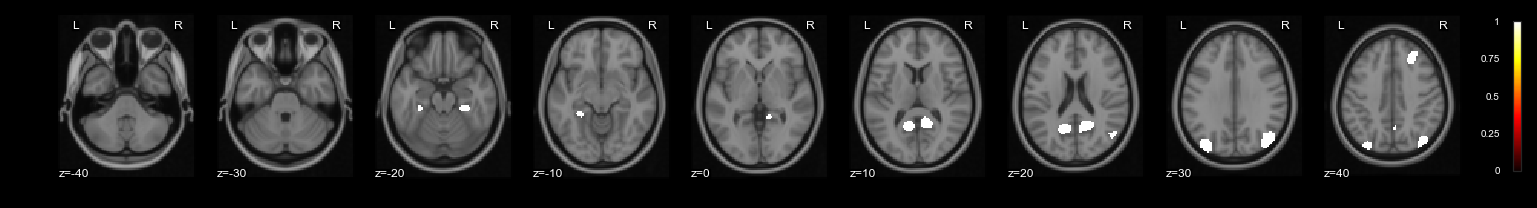

In [8]:
## Set up Folders

folder_path = "."

## Set up Mask

mask = 'vDMN.nii.gz'
mask_region = 'vDMN'

#mask = 'a1_rev.nii'
#mask_region = 'a1_rev'


mask_path = os.path.join(folder_path, 'masked_csv', mask_region)
mask = Brain_Data(data = folder_path + '/masked_csv/' + mask) # this now a 1d array of voxels containing 1's and 0s
mask.plot()


subjects = [ '145', '157', '168', '184', '200', '214',  '219', '220', '222', '223', '229', '245', '253', '257', '263',  '267', '270', '277']
subjects =  ['145', '157', '168', '184',  '200', '214', '219', '220', '222', '223', '229', '245', '253', '257', '263',  '267', '270', '277',  '282', '288']


num_subs = len(subjects)

In [10]:
# ##Pairwise by Pairwise

# ## Set up Video and Participants

# for video in range(4,6):

    
#     ## Behavioral Correlations
#     behavioral = pd.read_csv(mask_path + "/video_" + str(video) + '_behavioralcorrelations.csv', index_col='Unnamed: 0')
#     behavioral = behavioral.mask(np.tril(np.ones(behavioral.shape)).astype(np.bool))
#     behavioral = behavioral.stack().reset_index()[0]
#     #behavioral = shuffle(behavioral).reset_index()[0]

#     ## Scan Correlations
#     fMRI = pd.read_csv(mask_path + "/video_" + str(video) + '_fMRIcorrelations.csv',index_col='Unnamed: 0')
#     fMRI = fMRI.mask(np.tril(np.ones(fMRI.shape)).astype(np.bool))
#     #fMRI = fMRI.stack().reset_index()[0]

#     ## Expressivity
#     express = pd.read_csv('./data/videoInfo.csv')
    
    
#     #Concatenate Data Frame
#     corrs = pd.concat([behavioral, fMRI], axis=1)
#     corrs.columns = ['behav', 'scan']

#     # Fischer Z transform correlations
#     corrs['z_behav'] = 0.5*np.log((1+corrs['behav'])/(1-corrs['behav']))
#     corrs['z_behav'] = pd.to_numeric(corrs['z_behav'], errors='coerce')

#     corrs['z_scan'] = 0.5*np.log((1+corrs['scan'])/(1-corrs['scan']))
#     corrs['z_scan'] = pd.to_numeric(corrs['z_scan'], errors='coerce')
#     corrs = corrs.replace([np.inf, -np.inf], np.nan)

#     # Compute Correlation
#     corrs=corrs.dropna()
#     corr_values = scipy.stats.pearsonr(corrs['z_behav'], corrs['z_scan'])

#     actual = actual.append([corr_values[0]])
#     #null = null.append([corr_values[0]])

#     #Plot
#     plt.figure()
#     scat1 = sns.regplot(x="z_behav", y ="z_scan", data=corrs)

#     plt.title(f'Video {video}  |  Corr: {corr_values[0]: .3f}  |  P: {corr_values[1]: .3f}')
#     plt.xlabel('Behavioral Coefficients')
#     plt.ylabel('Scan Coefficients')



# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')

# kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=80);

# plt.hist(null, **kwargs);
# plt.hist(actual, **kwargs);

In [1]:
## Load data for each video and calculate average behavioral and ROI ISC

## Average
video_summary = pd.DataFrame()

print(mask)
print(mask_region)

for video in range(1,17):

    ## Behavioral Average
    behavioral = pd.read_csv(mask_path + "/video_" + str(video) + '_behavioralcorrelations.csv', index_col='Unnamed: 0')
    behavioral = behavioral.mask(np.tril(np.ones(behavioral.shape)).astype(np.bool))
    behavioral = behavioral.stack().reset_index()[0]

    ## fMRI Average
    fMRI = pd.read_csv(mask_path + "/video_" + str(video) + '_fMRIcorrelations.csv',index_col='Unnamed: 0')
    fMRI = fMRI.mask(np.tril(np.ones(fMRI.shape)).astype(np.bool))
    fMRI = fMRI.stack().reset_index()[0]

    #Concatenate Data Frame
    corrs = pd.concat([behavioral, fMRI], axis=1)
    corrs.columns = ['behav', 'scan']

    # Fischer Z transform correlations
    corrs['z_behav'] = 0.5*np.log((1+corrs['behav'])/(1-corrs['behav']))
    corrs['z_behav'] = pd.to_numeric(corrs['z_behav'], errors='coerce')

    corrs['z_scan'] = 0.5*np.log((1+corrs['scan'])/(1-corrs['scan']))
    corrs['z_scan'] = pd.to_numeric(corrs['z_scan'], errors='coerce')

    video_summary = video_summary.append([[video, corrs['z_behav'].mean(), corrs['z_scan'].mean()]])
    
video_summary.columns = ['video', 'z_behav', 'z_scan']

## Expressivity
express = pd.read_csv('./data/videoDesc.csv')
express = express.merge(video_summary, how='inner', left_on = 'videoNumber', right_on='video')


NameError: name 'pd' is not defined

BEQ x z_scan |  0.735  |  P:  0.001


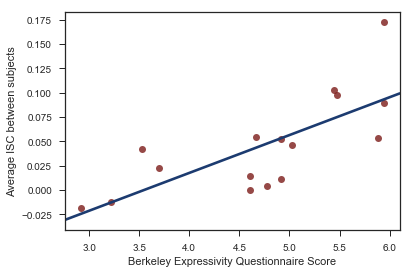

In [12]:
#Plot Data and Compute Correlations

x_value= 'BEQ'
y_value= 'z_scan'

corr_values = scipy.stats.pearsonr(express[x_value], express[y_value])

plt.figure()
sns.set_style("ticks")

scat1 = sns.regplot(x=x_value, y =y_value, data=express, ci=None, scatter_kws= {"color": "#7c1c19"}, line_kws={"color":"#1c3b70"})

#plt.title('Berkeley Expressitvity Questionnaire and Average vDMN ISC \n R: {corr_values[0]: .3f}  |  P: {corr_values[1]: .3f}')
plt.xlabel('Berkeley Expressivity Questionnaire Score')
plt.ylabel('Average ISC between subjects')

print( f'{x_value} x {y_value} | {corr_values[0]: .3f}  |  P: {corr_values[1]: .3f}')



In [13]:
## Check out that data

express

,videoNumber,VideoName,rateSelfOther,valencePositiveNegative,average_EA,BEQ,expressivity,mean_express,video,z_behav,z_scan
0,1,N_112_expulsion.mp4,Self,Negative,-0.206926,5.444444,10.444444,5.00,1,1.404023,0.102517
1,2,N_116_friendbreak.mp4,Self,Negative,0.502403,4.916667,9.666667,4.75,2,1.181572,0.011166
2,3,N_117_acl.mp4,Self,Negative,-0.116909,3.527778,3.527778,NaN,3,0.268558,0.041603
3,4,N_118_bigmove.mp4,Self,Negative,0.528699,4.916667,8.416667,3.50,4,0.606103,0.052714
4,5,N_125_kickout.mp4,Other,Negative,0.302281,4.611111,NaN,NaN,5,1.190475,0.000152
5,6,N_128_middlechild.mp4,Other,Negative,0.577249,5.027778,10.027778,5.00,6,1.429796,0.046063
6,7,N_133_depression.mp4,Other,Negative,0.013209,5.944444,NaN,NaN,7,0.667637,0.172441
7,8,N_137_eviction.mp4,Other,Negative,0.562308,5.944444,11.694444,5.75,8,0.642107,0.089344
8,9,P_121_abroad-2.mp4,Self,Positive,0.670937,5.472222,9.472222,4.00,9,0.555368,0.097862
9,10,P_141_nacamiento.mp4,Self,Positive,0.364653,2.916667,2.916667,NaN,10,0.488805,-0.019117
